# Import Libraries & Dataset


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

sales_df = pd.read_csv("./Datasets/advertising.csv")
sales_df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


## Applying Simple Linear Regression using Scikit-learn

In [4]:
# Create X from the tv column's values
x = sales_df["TV"].values

# Create y from the sales column's values
y = sales_df["sales"].values

# Reshape X to make it a 2d array
x = x.reshape(-1, 1)

# Check the shape of the features and targets
print(x.shape)
print(y.shape)

(200, 1)
(200,)


#### Fit the model

In [5]:
# Create the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(x, y)

# Make predictions
y_pred = reg.predict(x)

for i in range(10):
    print(f"Prediction: {y_pred[i]}, Actual: {y[i]}")

mse = mean_squared_error(y, y_pred)

#Calculating the R Squared score 
#Note: R Squared score is the default score for linear regression
print(f"\nR^2: {reg.score(x, y)}")

#Calculating the Mean Squared Error 
print(f"\nMSE: {mse:.4f}")

Prediction: 17.97077451276554, Actual: 22.1
Prediction: 9.147974048397073, Actual: 10.4
Prediction: 7.850223764575633, Actual: 9.3
Prediction: 14.234394574730187, Actual: 18.5
Prediction: 15.627218139417668, Actual: 12.9
Prediction: 7.446162320894965, Actual: 7.2
Prediction: 9.76595037402633, Actual: 11.8
Prediction: 12.746497729176669, Actual: 13.2
Prediction: 7.441408656851663, Actual: 4.8
Prediction: 16.530414307645042, Actual: 10.6

R^2: 0.611875050850071

MSE: 10.5127


#### Plotting the Data


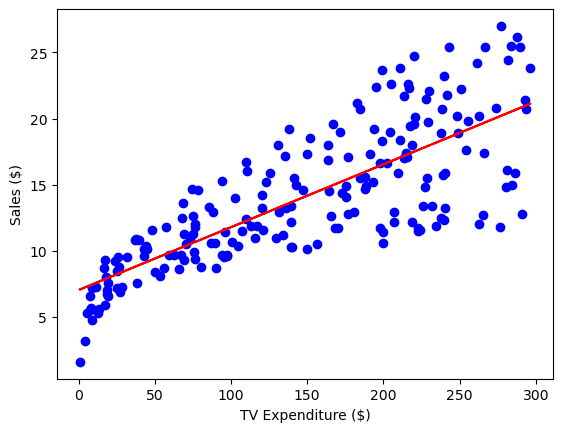

In [6]:
# Create scatter plot
plt.scatter(x, y, color="blue")

# Create line plot
plt.plot(x, y_pred, color="red")
plt.xlabel("TV Expenditure ($)")
plt.ylabel("Sales ($)")

# Display the plot
plt.show()

## Applying Simple Linear Regression from scratch

#### Cost Function

In [7]:
# Mean Squared Error cost function
def MSE_cost_fn(x, y, w, b):
    y_pred = np.dot(x, w) + b
    cost_fn = np.mean((y_pred - y)**2)
    return cost_fn, y_pred

#### Gradient Descent

In [8]:
# Gradient Descent implementation
def compute_gradient_descent(x, y_true, w, b, alpha, iterations):
    loss = []
    w_arr = []
    b_arr = []

    for i in range(iterations):
        cost, y_pred = MSE_cost_fn(x, y_true, w, b)
        loss.append(cost)

        # compute gradients
        dj_dw = np.mean((y_pred - y_true) * x)
        dj_db = np.mean(y_pred - y_true)
        
        # Clip gradients to prevent overflow      
        dj_dw = np.clip(dj_dw, -1e10, 1e10)       
        dj_db = np.clip(dj_db, -1e10, 1e10) 

        # update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db

        w_arr.append(w)
        b_arr.append(b)
        
        # Optional: Print progress
        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}, w = {w:.4f}, b = {b:.4f}")

    return loss, w_arr, b_arr

In [9]:
# Initial parameters
w = 0
b = 0
alpha = 0.01
iterations = 201

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
# Run Gradient Descent
loss, w_arr, b_arr = compute_gradient_descent(x_train, y_train, w, b, alpha, iterations)

Iteration 0: Cost = 224.7463, w = 21.1527, b = 0.1410
Iteration 100: Cost = 190240168577362132992.0000, w = 1833189.3769, b = 3781885116.3427
Iteration 200: Cost = 146836718651135705088.0000, w = 1833189.3769, b = 5950506587.6160


In [11]:
# Final parameters
w_final = w_arr[-1]
b_final = b_arr[-1]

print(f"Final weight (w): {w_final}")
print(f"Final bias (b): {b_final}")

Final weight (w): 1833189.3768573552
Final bias (b): 5950506587.616012


In [12]:
# Predictions using learned parameters
_, y_pred = MSE_cost_fn(x_train, y_train, w_final, b_final)

# print first up to 10 predictions vs actuals from the training set
for i in range(min(10, len(y_pred))):
    print(f"Prediction: {y_pred[i]}, Actual: {y_train[i]}")

print(y_pred.flatten().shape)

print(y_train.shape)

r_squared = r2_score(y_train, y_pred.flatten())

mse = mean_squared_error(y_train, y_pred.flatten())

#Calculating the R Squared score for the training data
print(f"\nR^2: {r_squared}")

#Calculating the Mean Squared Error for the training data
print(f"\nMSE: {mse}")

Prediction: [6.16315656e+09], Actual: 11.0
Prediction: [6.27498111e+09], Actual: 12.8
Prediction: [6.02951705e+09], Actual: 10.1
Prediction: [6.06471429e+09], Actual: 9.7
Prediction: [6.36114101e+09], Actual: 11.6
Prediction: [6.02053442e+09], Actual: 7.6
Prediction: [6.07992976e+09], Actual: 10.5
Prediction: [6.22053538e+09], Actual: 14.6
Prediction: [6.1422582e+09], Actual: 10.4
Prediction: [6.09037894e+09], Actual: 12.0
(160,)
(160,)

R^2: -1.4952394864321372e+18

MSE: 3.878090512997552e+19


In [13]:
print(x_train.shape)

print(y_pred.shape)

(160, 1)
(160, 1)


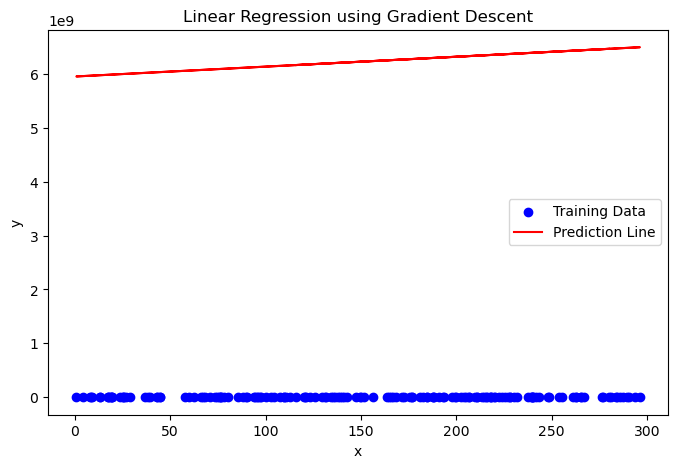

In [15]:
plt.figure(figsize=(8,5))
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_train, y_pred, color='red', label='Prediction Line')
plt.title("Linear Regression using Gradient Descent")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

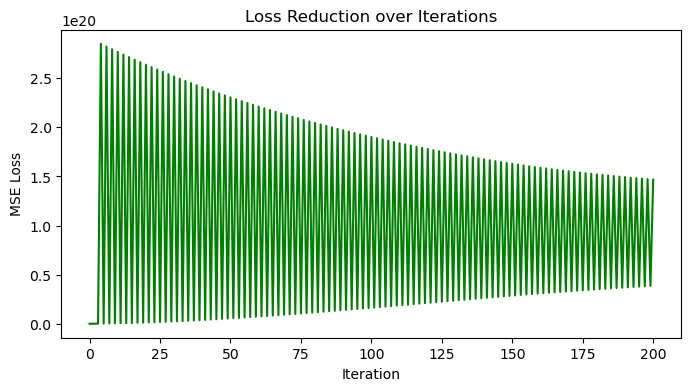

In [16]:
# Plot the loss over iterations
plt.figure(figsize=(8,4))
plt.plot(range(iterations), loss, color='green')
plt.title("Loss Reduction over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.show()

## Applying Multi-Linear Regression using Scikit-learn


In [17]:
x = sales_df.drop('sales', axis=1).values

y = sales_df["sales"].values

# Check the shape of the features and targets
print(x.shape)
print(y.shape)

(200, 3)
(200,)


#### Fit the model

In [18]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# Instantiate the model
reg = LinearRegression()

# Fit the model to the data
reg.fit(x_train, y_train)

# Make predictions
y_pred = reg.predict(x_test)

#### Evaluating the Model


In [19]:
# Compute R-squared
r_squared = reg.score(x_test, y_test)

# Compute RMSE
mse = mean_squared_error(y_test, y_pred, squared=False)

# Print the metrics
print("R^2: {}".format(r_squared))
print("RMSE: {}".format(mse))


R^2: 0.8984204533332627
RMSE: 1.5971739466799182


#### Plotting the Data


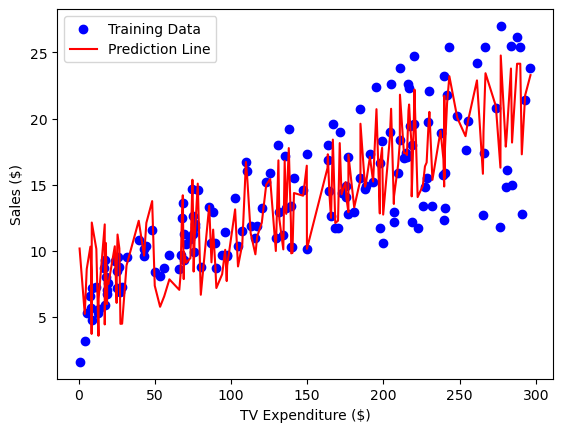

In [20]:
# Plot TV (first feature) vs Sales for the training set.
y_train_pred = reg.predict(x_train)

# Using the first column (TV) for plotting
tv_train = x_train[:, 0]

# Sort by TV to make the prediction line look correct
sort_idx = np.argsort(tv_train)
tv_sorted = tv_train[sort_idx]
y_pred_sorted = y_train_pred[sort_idx]

# Scatter plot of actual training data
plt.scatter(tv_train, y_train, color="blue", label="Training Data")

# Line plot of predictions (sorted by TV)
plt.plot(tv_sorted, y_pred_sorted, color="red", label="Prediction Line")
plt.xlabel("TV Expenditure ($)")
plt.ylabel("Sales ($)")
plt.legend()
plt.show()

## Applying Multi-Linear Regression from scratch

#### Gradient Descent

In [21]:
def compute_gradient_descent_multi(x, y, w, b, alpha, iterations):
    m = x.shape[0]  # number of training examples
    loss = []

    for i in range(iterations):
        cost, y_pred = MSE_cost_fn(x, y, w, b)
        loss.append(cost)

        # Gradients (correct vectorized form)
        dj_dw = (1/m) * np.dot(x.T, (y_pred - y))
        dj_db = (1/m) * np.sum(y_pred - y)

        # Update parameters
        w -= alpha * dj_dw
        b -= alpha * dj_db

    return loss, w, b

In [24]:
# Initial parameters
w = np.zeros(x_train.shape[1])
b = 0
alpha = 0.01
iterations = 201

print("x_train shape:", x_train.shape)
print("w shape:", w.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train shape: (160, 3)
w shape: (3,)


In [25]:
# Run Gradient Descent
loss, w_final, b_final = compute_gradient_descent_multi(x_train, y_train, w, b, alpha, iterations)

print(f"Final Weights: {w_final}")
print(f"Final Bias: {b_final}")

Final Weights: [nan nan nan]
Final Bias: nan


C:\Users\KareemWaleed\AppData\Local\Temp\ipykernel_35960\4069542820.py:4: RuntimeWarning: overflow encountered in square
  cost_fn = np.mean((y_pred - y)**2)
C:\Users\KareemWaleed\AppData\Local\Temp\ipykernel_35960\3649637742.py:14: RuntimeWarning: invalid value encountered in subtract
  w -= alpha * dj_dw


In [26]:
# Predictions
_, y_pred = MSE_cost_fn(x_train, y_train, w_final, b_final)

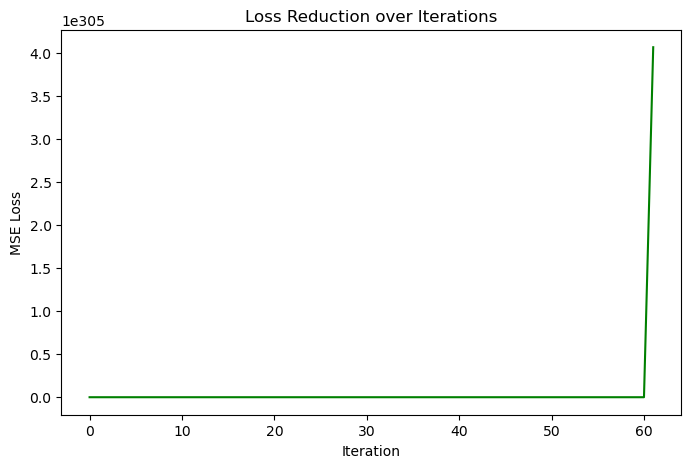

In [27]:
plt.figure(figsize=(8,5))
plt.plot(range(iterations), loss, color='green')
plt.title("Loss Reduction over Iterations")
plt.xlabel("Iteration")
plt.ylabel("MSE Loss")
plt.show()